### Cirq

En este apartado aparece como se puede construir un circuito en cirq que sirve para utilizar codificación superdensa, en la que pasamos un dos bits clasicos de un emisor a un receptor utilizando unicamente un qubit, para lo que necitaremos ademas un qubit adicional que este entrelazado con este primero para poder decodificar el mensaje en el receptor.

In [21]:
import cirq
from cirq import Simulator

Creamos una función que codifique el mensaje de dos bits en un solo qubit a parti de aplicar puertas X o Z

In [22]:
def encode_message(qc, qubit, msg):
    if msg == "00":
        pass    # Nada para mandar 00
    elif msg == "10":
        qc.append(cirq.Moment([cirq.X(qubit)])) 
        # Puerta X para mandar 10
    elif msg == "01":
        qc.append(cirq.Moment([cirq.Z(qubit)])) 
        # Puerta Z para mandar 01
    elif msg == "11":
        qc.append(cirq.Moment([cirq.Z(qubit)]))
        # Puerta Z para mandar 11
        qc.append(cirq.Moment([cirq.X(qubit)])) 
        # sequida de una puerta X
    else:
        print("Invalid Message: Sending '00'")

Y cremos una funcion que decodifique dicho mensaje que nos han mandado con un solo qubit

In [23]:
def decode_message(qc, a, b):
    circ.append(cirq.CNOT(a, b))
    qc.append(cirq.H(a))

Cremos el circuito que se encargara de enviar mensajes de dos bits atraves de un solo qubit

In [24]:
q0 = cirq.NamedQubit('q0')
q1 = cirq.NamedQubit('q1')
q2 = cirq.NamedQubit('q2')

# Añadimos el entrelazamiento entre los qubits q0 y q1
circ = cirq.Circuit(cirq.H(q0), cirq.CNOT(q0, q1))

# Utilizamos como mensaje 11 y lo codificamos usandos la funcion creada
message = "11"
encode_message(circ, q0, message)

# El receptor recive q0 y a traves de este y q1 que esta 
# entrelazado con q0 desde antes de la codificación 
# decodifica el mensaje 
decode_message(circ, q0, q1)

# Se miden los resultados 
circ.append(cirq.measure(q0))
circ.append(cirq.Moment([cirq.measure(q1)]))

print(circ)

q0: ───H───@───Z───X───@───H───M───────
           │           │
q1: ───────X───────────X───────────M───


Tal y como vemos en la simulación la unica salida en las 1000 iteraciones es '11' que es el mensaje que queriamos transmitir, por tanto en condiciones ideales se demuestra que el circuito funciona tal y como debería.

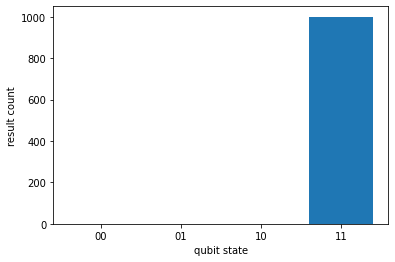

In [25]:
simulator = Simulator()
result = simulator.run(circ, repetitions=1000)
counts = cirq.plot_state_histogram(result)